## Evaluation Metrics
---

For each boxes, left-most/top-most upon the summation of both entities make up the following terms.


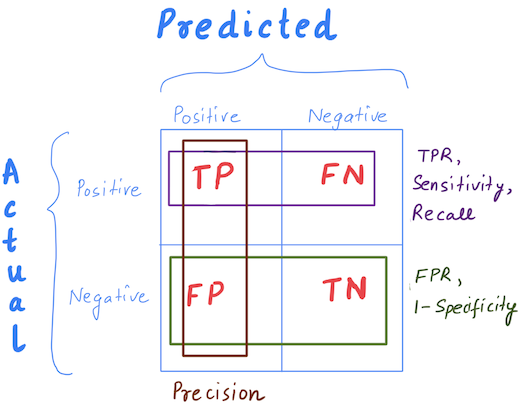

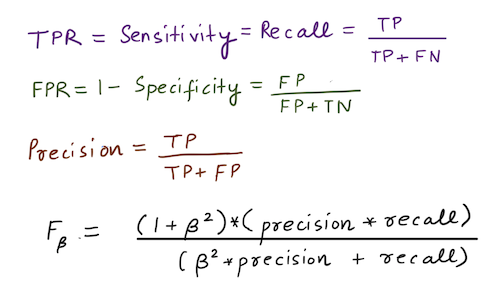

###F-beta score:
---
    
The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0.


The beta parameter determines the weight of recall in the combined score. beta < 1 lends more weight to precision, while beta > 1 favors recall (beta -> 0 considers only precision, beta -> +inf only recall).

The intuition for precision is that it is not concerned with false negatives and it minimizes false positives.

The intuition for recall is that it is not concerned with false positives and it minimizes false negatives.


We will now use a Logistic Regression model and compare the f_beta scores for different values of beta, across a range of probability thresholds.

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load the Breast Cancer dataset using Sklearn's datasets class and load X and y variables
cancer_data = datasets.load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

# split the data using Scikit-Learn's train_test_split into X_train, X_test, y_train and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle= True)

# Instantiate a logistic regression model, set the max_iter to 3000
logreg = LogisticRegression( max_iter=100)
# fit the logreg instance to the dataset
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_test_probs = logreg.predict_proba(X_test)[:,1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Containers for f-beta, precision, and recall scores at different prob. thresholds
f1_scores = []
f0_5_scores = []
f2_scores = []
f10_scores = []
f0_01_scores = []


# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0, 1, num=100)

# Find scores for each threshold
for p in probability_thresholds:

    y_test_preds = []

    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)

    f1 = sklearn.metrics.f1_score(y_test, y_test_preds)
    f1_scores.append(f1)

    f0_01 = sklearn.metrics.fbeta_score(y_test, y_test_preds, beta=0.01)
    f0_01_scores.append(f0_01)

    f10  = sklearn.metrics.fbeta_score(y_test, y_test_preds, beta=10)
    f10_scores.append(f10)

    # To DO:
    # f0_5 = ........

    # f2 = .......

    f0_5 = sklearn.metrics.fbeta_score(y_test, y_test_preds, beta=0.5)
    f0_5_scores.append(f0_5)

    f2  = sklearn.metrics.fbeta_score(y_test, y_test_preds, beta=2)
    f2_scores.append(f2)



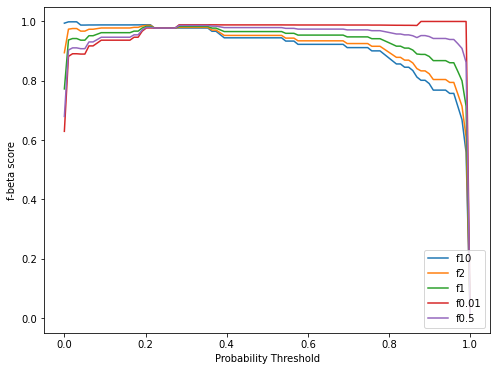

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot f_beta, precision, recall curves

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(probability_thresholds, f10_scores, label='f10')

# TO DO: plot the f2 scores
ax.plot(probability_thresholds, f2_scores, label='f2')

ax.plot(probability_thresholds, f1_scores, label='f1')
ax.plot(probability_thresholds, f0_01_scores, label='f0.01')

# TO DO: plot the f2 scores
ax.plot(probability_thresholds, f0_5_scores, label='f0.5')

ax.set_xlabel('Probability Threshold')
ax.set_ylabel('f-beta score')
ax.legend(loc='lower right');

We can adjust the threshold to optimize the F1 score. Notice that for both precision and recall you could get perfect scores by increasing or decreasing the threshold. Good thing is, you can find a sweet spot for F1 score

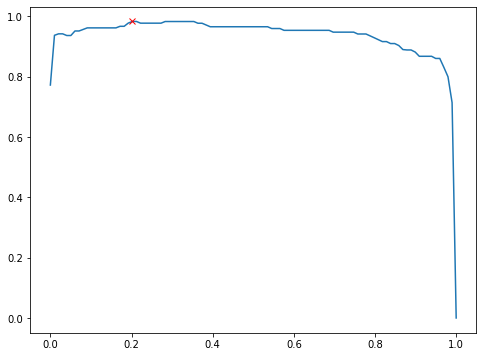

In [ ]:
from numpy.core.fromnumeric import argmax

# getting the probability threshold for which f1_score value is highest
max_prob = argmax(np.array(f1_scores))

# plotting f1_score vs probability threshold

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(probability_thresholds, f1_scores, label='f1')
plt.plot(max_prob/100, max(f1_scores), "-x", color = "red")

###ROC AUC
---
AUC means area under the curve so to speak about ROC AUC score we need to define ROC curve first.

It is a chart that visualizes the tradeoff between true positive rate (TPR) and false positive rate (FPR). Basically, for every threshold, we calculate TPR and FPR and plot it on one chart.

Of course, the higher TPR and the lower FPR is for each threshold the better and so classifiers that have curves that are more top-left-side are better.

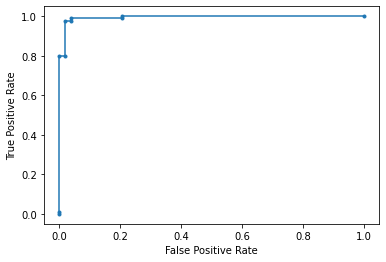

In [ ]:
import matplotlib.pyplot as plt
lr_fpr, lr_tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_test_probs)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### Precision-Recall Curve
---
It is a curve that combines precision (PPV) and Recall (TPR) in a single visualization. For every threshold, you calculate PPV and TPR and plot it. The higher on y-axis your curve is the better your model performance.

You can use this plot to make an educated decision when it comes to the classic precision/recall dilemma. Obviously, the higher the recall the lower the precision. Knowing at which recall your precision starts to fall fast can help you choose the threshold and deliver a better model.

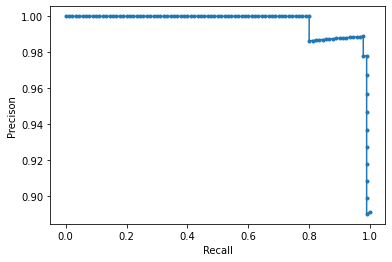

In [ ]:
# TO DO: Plot Precision-Recall curves using sklearn.metrics.precision_recall_curve

import matplotlib.pyplot as plt
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_test, y_test_probs)

plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel("Recall")
plt.ylabel("Precison")
plt.show()


### ROC AUC vs PR AUC
---
- If you care more about the positive class, then using PR AUC, which is more sensitive to the improvements for the positive class, is a better choice. One common scenario is a highly imbalanced dataset where the fraction of positive class, which we want to find (like in fraud detection), is small.

- If you care equally about the positive and negative class or your dataset is quite balanced, then going with ROC AUC is a good idea.

### Deep Learning Frameworks

---
Deep learning (DL) frameworks offer building blocks for designing, training, and validating a variety of deep neural networks through a high-level programming interface. Some of the widely used DL frameworks in research and industry include MXNet, PyTorch, TensorFlow, and many more.

We'll primarily be focusing on Tensorflow and PyTorch as these frameworks are the ones most widely used in industry and academia. It's important to note that there are different areas where one of these is easier to work with as compared to the other, and choosing one over the other is largely a matter of personal preference.


At the heart of deep learning are tensors. Tensors are mathematical objects that generalize scalars, vectors and matrices to higher dimensions, and are represented using $n$-dimensional arrays (ndarrays). Some common examples of tensor representations include:

 - Vectors: 1D — (features)
 - Sequences: 2D — (timesteps, features)
 - Images: 3D — (height, width, channels)
 - Videos: 4D — (frames, height, width, channels)

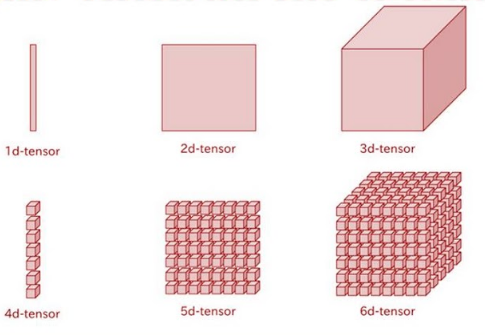

###### Source - https://medium.datadriveninvestor.com/what-is-the-tensor-in-deep-learning-77c2af7224a1

There are three primary attributes that define a tensor:
 - Rank - It refers to the tensor’s number of axes.
 - Shape - It refers to the number of dimensions along each axis.
 - Data type - It refers to the type of data contained in it.

### TensorFlow
---

TensorFlow is a fast, flexible, and scalable open-source machine learning library for research and production developed by Google.

In [ ]:
import tensorflow as tf

#### Creation of tensor

In [ ]:
sample = tf.constant([0.0, 1.0, 2.0, 3.0], dtype=tf.float32)

random_samples_2x3 = tf.random.uniform(shape=[2, 3])

print(sample, "\n", random_samples_2x3)

tf.Tensor([0. 1. 2. 3.], shape=(4,), dtype=float32) 
 tf.Tensor(
[[0.5565827  0.23370147 0.6203022 ]
 [0.27306557 0.21027899 0.13496327]], shape=(2, 3), dtype=float32)


#### Addition of two tensors

In [ ]:
x_3x3 = tf.random.uniform(shape=[3, 3])
y_3x3 = tf.random.uniform(shape=[3, 3])
print(x_3x3, "\n", y_3x3)

print("addition of 2 tensors: ", tf.add(x_3x3, y_3x3))

tf.Tensor(
[[0.22247446 0.06678379 0.11700153]
 [0.9146048  0.37039256 0.24544668]
 [0.79560065 0.9550655  0.43104017]], shape=(3, 3), dtype=float32) 
 tf.Tensor(
[[0.84460187 0.95094323 0.41063   ]
 [0.6383108  0.02769566 0.33794212]
 [0.86739373 0.9307796  0.24493062]], shape=(3, 3), dtype=float32)
addition of 2 tensors:  tf.Tensor(
[[1.0670763  1.017727   0.5276315 ]
 [1.5529156  0.39808822 0.5833888 ]
 [1.6629944  1.8858451  0.6759708 ]], shape=(3, 3), dtype=float32)


In [ ]:
print(tf.zeros([4, 4]))
print(tf.ones([4, 4]))
print(tf.eye(4, 4))

tf.Tensor(
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]], shape=(4, 4), dtype=float32)
tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(4, 4), dtype=float32)
tf.Tensor(
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]], shape=(4, 4), dtype=float32)


#### Reshaping a tensor

In [ ]:
x = tf.range(24)
print(x)
tf.reshape(x, shape=[2, 3, 4])     # reshaping a 1D array to a 3D array

tf.Tensor([ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23], shape=(24,), dtype=int32)


<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]], dtype=int32)>

In [ ]:
tf.reshape(x, shape=[2, 2, -1])     # -1 is like automatic calculation based on the total values in the tensor

<tf.Tensor: shape=(2, 2, 6), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]],

       [[12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]], dtype=int32)>

#### Squaring each value in tensor

In [ ]:
tf.math.pow(sample, 2)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 4., 9.], dtype=float32)>

#### Mean of the sample tensor

In [ ]:
tf.math.reduce_mean(sample)

<tf.Tensor: shape=(), dtype=float32, numpy=1.5>

##### Creating a normally distributed tensor with Mean = 0.0 and Standard deviation = 1. And then sampling 500 examples from it.

In [ ]:
import tensorflow_probability as tfp
tfd = tfp.distributions
N = 500    # number of samples to be drawn from the distribution
mean = 0.
std = 1.
d = tfd.Normal(loc=mean, scale=std)
samples = d.sample(N)
print("Average of the samples is ", tf.math.reduce_mean(samples))

Average of the samples is  tf.Tensor(0.0027179455, shape=(), dtype=float32)


#### Sort a tensor

In [ ]:
samples = tf.sort(samples)
print(samples)

tf.Tensor(
[-2.8348372  -2.7063916  -2.6722713  -2.6433396  -2.6393993  -2.5406375
 -2.2706735  -2.1418812  -2.0861163  -2.0050287  -1.9732146  -1.9661409
 -1.9123908  -1.9010848  -1.8879813  -1.887182   -1.8781604  -1.8035948
 -1.7855313  -1.7792695  -1.7527804  -1.7148746  -1.6551636  -1.6295406
 -1.6258657  -1.5966389  -1.5943238  -1.5661142  -1.5657139  -1.5542659
 -1.5385969  -1.5131481  -1.5094978  -1.5089675  -1.5007095  -1.4792525
 -1.4750082  -1.461701   -1.4143531  -1.3940914  -1.3888948  -1.3838558
 -1.3559359  -1.3516264  -1.3366096  -1.335129   -1.3272953  -1.3121921
 -1.2938479  -1.291792   -1.2835225  -1.2786533  -1.2627432  -1.2546241
 -1.2532982  -1.2531767  -1.253051   -1.2515266  -1.2414335  -1.2316263
 -1.2283355  -1.2034037  -1.1906955  -1.1531312  -1.1524507  -1.1388772
 -1.1058236  -1.0814258  -1.0796478  -1.077981   -1.0708212  -1.0675309
 -1.0501581  -1.0307972  -1.0306445  -1.0205135  -1.0202453  -1.0151943
 -1.0024202  -0.9712306  -0.96798855 -0.9607009  -0.9

#### Calculating variance of tensor

In [ ]:
tf.math.reduce_variance(samples)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0115821>

### Tensor Manipulation exercise in TensorFlow
---

Create a 3D tensor with random values of dimensions ($3 \times a \times b$).
$a$ and $b$ can be any positive `int` values

 - Square the first row `(i=0, _, _)` values and print it's mean
 - Cube the second row `(i=1, _, _)` values and print it's variance
 - Raise to 4 the third row `(i=2, _, _)` values and print it's standard deviation

Also print the overall sum of all the elements of the tensor.

You may need to use [`tf.stack`](https://www.tensorflow.org/api_docs/python/tf/stack)

In [ ]:
a = 3
b = 4

x = tf.random.uniform(shape=[3, a, b])

x_0 = tf.math.pow(x[0], 2) #3*3 (a*b)
x_1 = tf.math.pow(x[1], 3)
x_2 = tf.math.pow(x[2], 4)
x = tf.stack([x_0, x_1, x_2]) #add one more rank

print(tf.math.reduce_mean(x_0));
print(tf.math.reduce_variance(x_1));
print(tf.math.reduce_std(x_2));
print(tf.math.reduce_sum(x));

tf.Tensor(0.20988744, shape=(), dtype=float32)
tf.Tensor(0.05928548, shape=(), dtype=float32)
tf.Tensor(0.19701096, shape=(), dtype=float32)
tf.Tensor(6.495592, shape=(), dtype=float32)


In [ ]:
x_0.shape

TensorShape([3, 4])

In [ ]:
x.shape

TensorShape([3, 3, 4])

### PyTorch
---

PyTorch is an open source machine learning framework based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab (FAIR).

In [ ]:
import torch

#### Creation of tensor

In [ ]:
sample = torch.tensor([0.0, 1.0, 2.0, 3.0])

random_samples_2x3 = torch.rand(2, 3)

print(sample, "\n", random_samples_2x3)

tensor([0., 1., 2., 3.]) 
 tensor([[0.4309, 0.9660, 0.8592],
        [0.5160, 0.6693, 0.4742]])


#### Addition of two tensors

In [ ]:
x_3x3 = torch.rand(3, 3)
y_3x3 = torch.rand(3, 3)
print(x_3x3, "\n", y_3x3)

print("addition of 2 tensors: ", torch.add(x_3x3, y_3x3))

tensor([[0.5767, 0.1946, 0.2115],
        [0.2132, 0.4949, 0.1574],
        [0.5403, 0.2333, 0.5044]]) 
 tensor([[0.6107, 0.6058, 0.5717],
        [0.6039, 0.6892, 0.3234],
        [0.4032, 0.7920, 0.8779]])
addition of 2 tensors:  tensor([[1.1873, 0.8004, 0.7832],
        [0.8172, 1.1841, 0.4809],
        [0.9435, 1.0253, 1.3824]])


In [ ]:
print(torch.zeros(4, 4))
print(torch.ones(4, 4))
print(torch.eye(4, 4))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])


#### Reshaping a tensor

In [ ]:
x = torch.arange(24)
print(x)
x.reshape(2, 3, 4)     # reshaping a 1D array to a 3D array

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23])


tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [ ]:
x.reshape(2, 2, -1)     # -1 is like automatic calculation based on the total values in the tensor

tensor([[[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11]],

        [[12, 13, 14, 15, 16, 17],
         [18, 19, 20, 21, 22, 23]]])

#### Squaring each value in tensor

In [ ]:
sample.pow(2)

tensor([0., 1., 4., 9.])

#### Mean of the sample tensor

In [ ]:
sample.mean()

tensor(1.5000)

#### Creating a normal distribution with Mean = 0.0 and Standard deviation = 1. And then sampling 500 examples from it.

In [ ]:
N = 500    # number of samples to be drawn from the distribution
mean, std = torch.tensor([0.0]), torch.tensor([1])
d = torch.distributions.Normal(mean, std)
samples = d.sample((N, ))
print("Average of the samples is ", samples.mean())

Average of the samples is  tensor(0.0830)


#### Sort a tensor


In [ ]:
samples, _ = torch.sort(samples, dim=0)    # this function returns values and indices
print(samples)

tensor([[-2.8726e+00],
        [-2.7913e+00],
        [-2.4475e+00],
        [-2.2901e+00],
        [-2.2717e+00],
        [-2.1859e+00],
        [-2.1576e+00],
        [-2.1525e+00],
        [-2.0374e+00],
        [-2.0317e+00],
        [-1.9697e+00],
        [-1.9313e+00],
        [-1.9312e+00],
        [-1.9027e+00],
        [-1.8219e+00],
        [-1.8209e+00],
        [-1.7958e+00],
        [-1.7935e+00],
        [-1.7571e+00],
        [-1.7471e+00],
        [-1.7341e+00],
        [-1.6881e+00],
        [-1.6499e+00],
        [-1.6478e+00],
        [-1.6364e+00],
        [-1.6298e+00],
        [-1.6271e+00],
        [-1.6206e+00],
        [-1.6058e+00],
        [-1.5742e+00],
        [-1.5508e+00],
        [-1.5427e+00],
        [-1.5291e+00],
        [-1.5056e+00],
        [-1.4778e+00],
        [-1.4769e+00],
        [-1.4613e+00],
        [-1.4605e+00],
        [-1.4423e+00],
        [-1.4281e+00],
        [-1.4267e+00],
        [-1.4254e+00],
        [-1.3943e+00],
        [-1

#### Calculating variance of torch tensor

In [ ]:
torch.var(samples, unbiased=False)

tensor(1.0693)

### Tensor Manipulation exercise in PyTorch
---

Create a 3D tensor with random values of dimensions ($3 \times a \times b$).
$a$ and $b$ can be any positive `int` values

 - Square the first row `(i=0, _, _)` values and print it's mean
 - Cube the second row `(i=1, _, _)` values and print it's variance
 - Raise to 4 the third row `(i=2, _, _)` values and print it's standard deviation

Also print the overall sum of all the elements of the tensor.

In [ ]:
a = 3
b = 3

x = torch.rand(3, a, b)

x[0] = x[0].pow(2)
x[1] = x[1].pow(3)
x[2] = x[2].pow(4)

print(x[0].mean());
print(x[1].var());
print(x[2].std());
print(x.sum());

tensor(0.3093)
tensor(0.0141)
tensor(0.3443)
tensor(7.6562)
